Ejercicio 2.C
Siguiendo con el DataFrame anterior:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

model_metrics = pd.read_csv("tiempos_red_neuronal.csv", sep=",", index_col=0)
model_metrics.rename(columns={'talla': 'epoca'}, inplace=True)
model_metrics = model_metrics.dropna()
model_metrics.drop(columns=["desviacion"], inplace=True)
model_metrics.head()

,funcion_activacion,epoca,tiempo
0,lineal,12.0,156.885412
1,sigmoid,12.0,160.744537
2,tanh,12.0,158.876953
3,relu,12.0,161.685764
4,selu,12.0,160.904838


Haz una regresión lineal de los datos para cada tipo de activación.
Haz un gráfico que:
 - Muestre la recta de la regresión de cada función de activación.
 - En la etiqueta de cada función de activación se muestre también el valor de R² para cada uno de ellos.

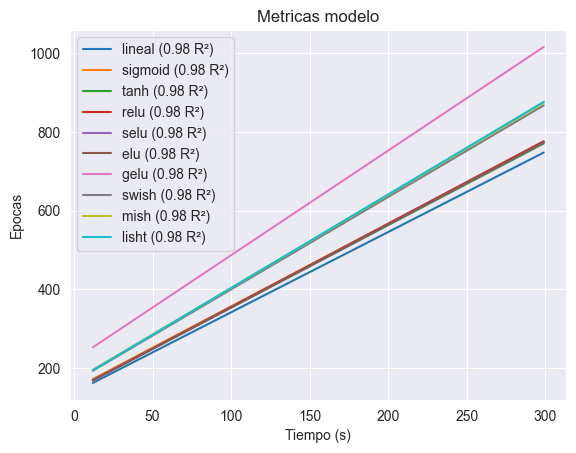

In [21]:
activation_functions = model_metrics["funcion_activacion"].unique()

for act_fun in activation_functions:
    function_records = model_metrics[
        (model_metrics["funcion_activacion"] == act_fun)
    ]
    function_x = function_records["epoca"].to_frame()
    function_y = function_records["tiempo"].to_frame()

    model = LinearRegression()
    model.fit(function_x, function_y)

    my_df = function_records.copy()
    my_df.loc[:, "y_pred"] = model.predict(function_x)

    label = f"{act_fun} ({model.score(function_x, function_y):.2f} R²)"
    plt.plot(my_df['epoca'], my_df['y_pred'], label=label)

plt.xlabel('Tiempo (s)')
plt.ylabel('Epocas')
plt.title('Metricas modelo')
plt.legend()
plt.show()